In [1]:
from detectron2.structures import BoxMode

In [2]:
from medvqa.datasets.mimiccxr.mimiccxr_vision_dataset_management import get_detectron2_adapted_data

In [3]:
from medvqa.datasets.chest_imagenome import CHEST_IMAGENOME_BBOX_NAMES
from detectron2.data import MetadataCatalog, DatasetCatalog

for d in ["train", "validate"]:
    DatasetCatalog.register("chest_imagenome_" + d, lambda d=d: get_detectron2_adapted_data(d))
    MetadataCatalog.get("chest_imagenome_" + d).set(thing_classes=CHEST_IMAGENOME_BBOX_NAMES)
chest_imagenome_metadata = MetadataCatalog.get("chest_imagenome_train")

In [4]:
import random
import cv2
from detectron2.utils.visualizer import Visualizer

In [20]:
train_data = DatasetCatalog.get('chest_imagenome_train')

111it [00:00, 1040.05it/s]

Loading cached detailed metadata from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/detailed_metadata.pkl
Loaded 240530 non-gold DICOM IDs from Chest Imagenome
Using source image size mode: small_256x256
Loaded 242280 decent image IDs


227835it [02:11, 1733.62it/s]


Skipped 992 images
Saved to /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/detectron2_adapted_data(train,small_256x256,decent=True,clamp=True).pkl


In [5]:
val_data = DatasetCatalog.get('chest_imagenome_validate')

Loading cached detailed metadata from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/detailed_metadata.pkl
Loaded 240530 non-gold DICOM IDs from Chest Imagenome
Using source image size mode: small_256x256
Loaded 242280 decent image IDs


227835it [00:01, 157712.35it/s]


Skipped 11 images
Saved to /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/detectron2_adapted_data(validate,small_256x256,decent=True,clamp=True).pkl


In [15]:
import matplotlib.pyplot as plt

def plot_cv2_image(image, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

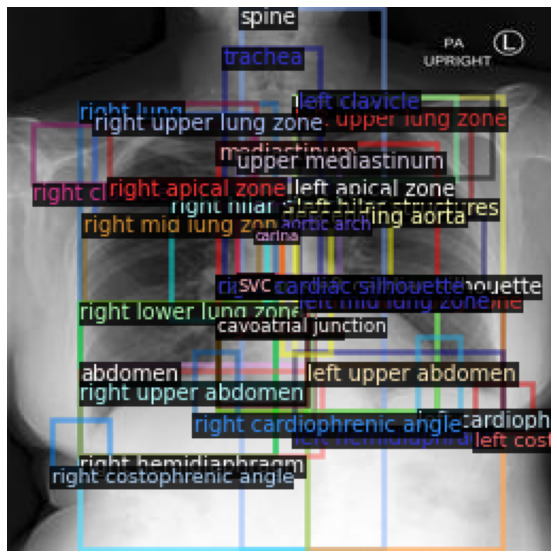

In [19]:
for d in random.sample(val_data, 1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=chest_imagenome_metadata)
    out = visualizer.draw_dataset_dict(d)
    plot_cv2_image(out.get_image())
#     cv2_imshow(out.get_image()[:, :, ::-1])

In [10]:
out.get_image()[:, :, ::-1].shape

(256, 256, 3)